### Importing libraries, functions and CSV

In [1]:
import pandas as pd
import requests
from pandas import json_normalize
import os
from dotenv import load_dotenv
import time
import re
from bs4 import BeautifulSoup
import src.functions as f
import src.downloading_and_cleaning as d
import src.api as api
import src.enriching_and_cleaning as e
import src.scrapping as s
import src.visualization as v
load_dotenv()

True

In [2]:
if (load_dotenv()):
    os.system('say -v Samantha dotenv works!')

In [3]:
d.download_dataset()

0

In [4]:
df = pd.read_csv("data/dataset.csv")

In [5]:
df.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


### Preliminary cleaning

In [6]:
df = d.preliminary_cleaning(df)

In [7]:
df_url = df['Series_Titles_URL']

In [8]:
df_url.head(3)

0    The:Shawshank:Redemption
1               The:Godfather
2             The:Dark:Knight
Name: Series_Titles_URL, dtype: object

### Calling the API

In [ ]:
dict_ = api.calling_api(df_url)

In [ ]:
df_pruebas = pd.DataFrame.from_dict(dict_)

In [ ]:
df_pruebas.to_csv("pruebas.csv")

In [9]:
df_pruebas = pd.read_csv("pruebas.csv")

In [10]:
dict_2 = df_pruebas.to_dict()

### Enriching the dataframe with data taken from de API

#### We are only keeping the 100 first films

In [11]:
df_short = df.head(100)

In [12]:
df_short_clean = e.enriching(df, df_short, dict_2)

In [13]:
df_short_clean = e.more_cleaning(df_short_clean)

In [14]:
df_short_clean.head(4)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,IMDB_ID,Star1_Character1,Star2_Character2,Star3_Character3,Star4_Character4,Genres_Clean,Genres_Grouped
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,2343110,28341469,tt0111161,Tim Robbins as Unknown,Morgan Freeman as Unknown,Bob Gunton as Unknown,William Sadler as Unknown,Drama,Drama
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411,tt0068646,Marlon Brando as Unknown,Al Pacino as Unknown,James Caan as Unknown,Diane Keaton as Unknown,Drama,Drama
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444,tt0468569,Christian Bale as Unknown,Heath Ledger as Unknown,Aaron Eckhart as Unknown,Michael Caine as Unknown,Action,Action + Adventure
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000,tt0071562,Al Pacino as Unknown,Robert De Niro as Unknown,Robert Duvall as Unknown,Diane Keaton as Unknown,Drama,Drama


In [15]:
df_short_clean.to_csv("data/df_short_clean.csv")

In [16]:
os.system('say -v Samantha exporting first dataframe')

0

### Scrapping

In [17]:
filmaffinity = s.scrapping()

In [18]:
filmaffinity.head()

,Title_FA,Year_FA,Director_FA,Rating_FA,No_of_Votes_FA
0,The Godfather,1972,Francis Ford Coppola,9.0,170799
1,The Godfather: Part II,1974,Francis Ford Coppola,8.9,136024
2,12 Angry Men,1957,Sidney Lumet,8.7,67224
3,Schindler's List,1993,Steven Spielberg,8.6,171200
4,Witness for the Prosecution,1957,Billy Wilder,8.6,42791


In [19]:
IMDB = s.cleaning(df_short_clean)

In [20]:
IMDB.head()

,Title_IMDB,Year_IMDB,Rating_IMDB,Director_IMDB,No_of_Votes_IMDB
0,The Shawshank Redemption,1994,9.3,Frank Darabont,2343110
1,The Godfather,1972,9.2,Francis Ford Coppola,1620367
2,The Dark Knight,2008,9.0,Christopher Nolan,2303232
3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,1129952
4,12 Angry Men,1957,9.0,Sidney Lumet,689845


In [21]:
df_IMDB_FA = s.joining(IMDB,filmaffinity)

In [22]:
df_IMDB_FA.head()

,Title_IMDB,Year_IMDB,Rating_IMDB,Director_IMDB,No_of_Votes_IMDB,Title_FA,Year_FA,Director_FA,Rating_FA,No_of_Votes_FA
0,The Shawshank Redemption,1994,9.3,Frank Darabont,2343110,The Godfather,1972,Francis Ford Coppola,9.0,170799
1,The Godfather,1972,9.2,Francis Ford Coppola,1620367,The Godfather: Part II,1974,Francis Ford Coppola,8.9,136024
2,The Dark Knight,2008,9.0,Christopher Nolan,2303232,12 Angry Men,1957,Sidney Lumet,8.7,67224
3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,1129952,Schindler's List,1993,Steven Spielberg,8.6,171200
4,12 Angry Men,1957,9.0,Sidney Lumet,689845,Witness for the Prosecution,1957,Billy Wilder,8.6,42791


### Intersection

In [23]:
df_intersection = s.intersection(df_IMDB_FA, IMDB, filmaffinity)

In [24]:
df_intersection

,Title,Rating_FA,No_of_Votes_FA,Rating_IMDB,No_of_Votes_IMDB
0,12 Angry Men,8.7,67224,9.0,689845
1,Goodfellas,8.4,109730,8.7,1020727
2,One Flew Over the Cuckoo's Nest,8.3,108740,8.7,918088
3,Pulp Fiction,8.6,198859,8.9,1826188
4,Schindler's List,8.6,171200,8.9,1213505
5,The Godfather,9.0,170799,9.2,1620367
6,The Godfather: Part II,8.9,136024,9.0,1129952
7,The Shawshank Redemption,8.6,165185,9.3,2343110


#### Exporting dataframes

In [25]:
df_IMDB_FA.to_csv("data/df_IMDB_FA.csv")

In [26]:
os.system('say -v Samantha exporting second dataframe')

0

In [27]:
df_intersection.to_csv("data/IMDB_FA_reduced.csv")

In [28]:
os.system('say -v Samantha exporting last dataframe')


0

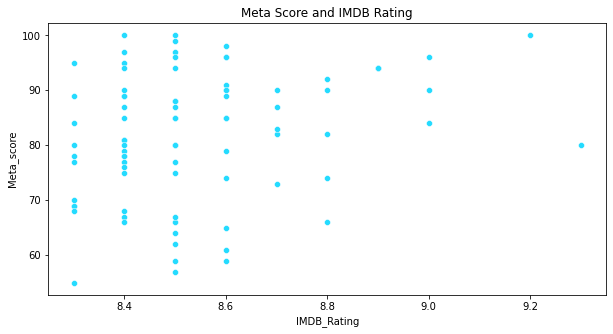

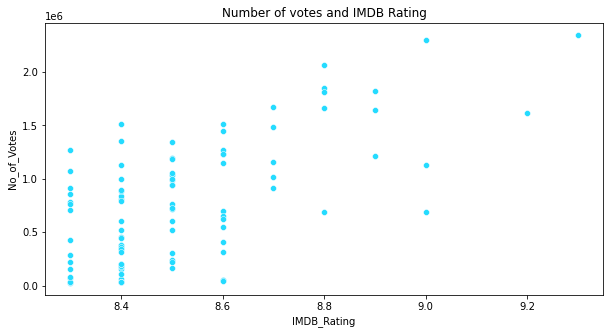

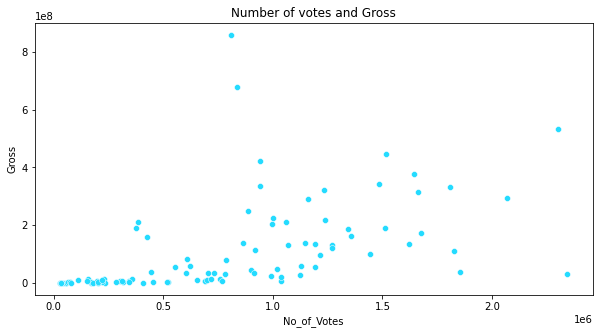

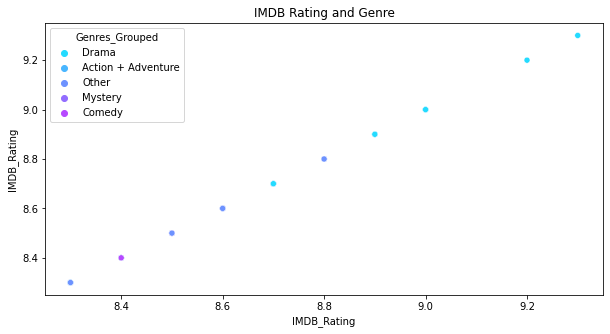

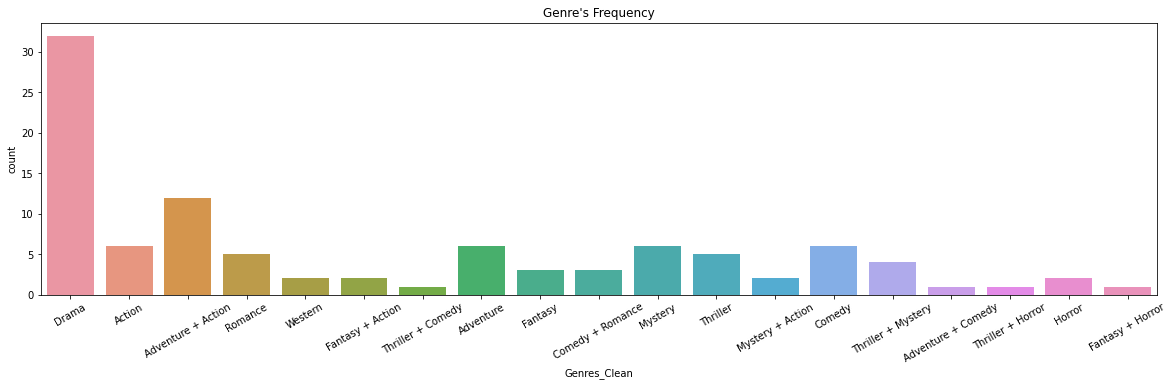

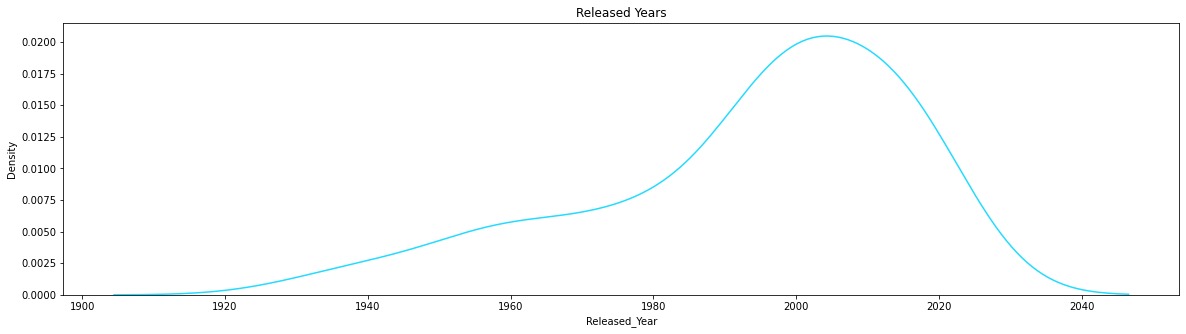

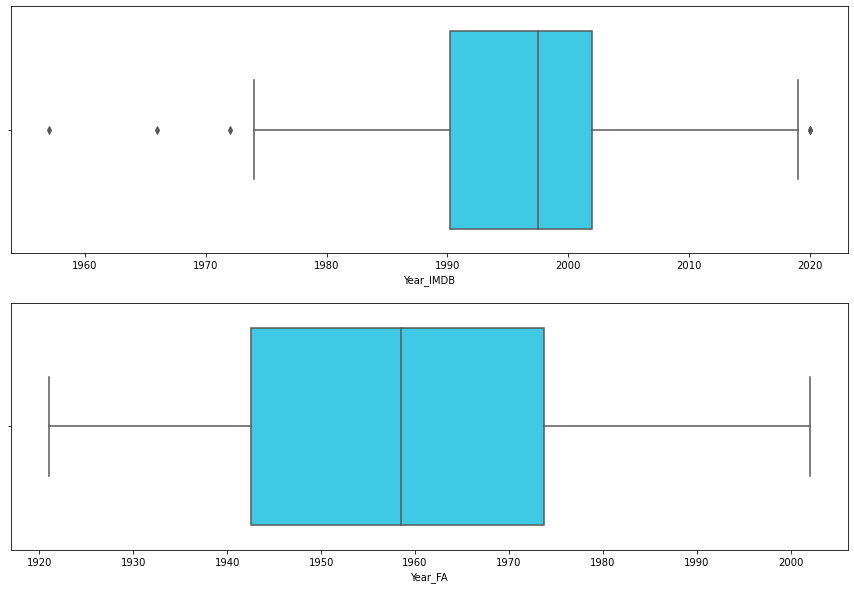

<Figure size 432x288 with 0 Axes>

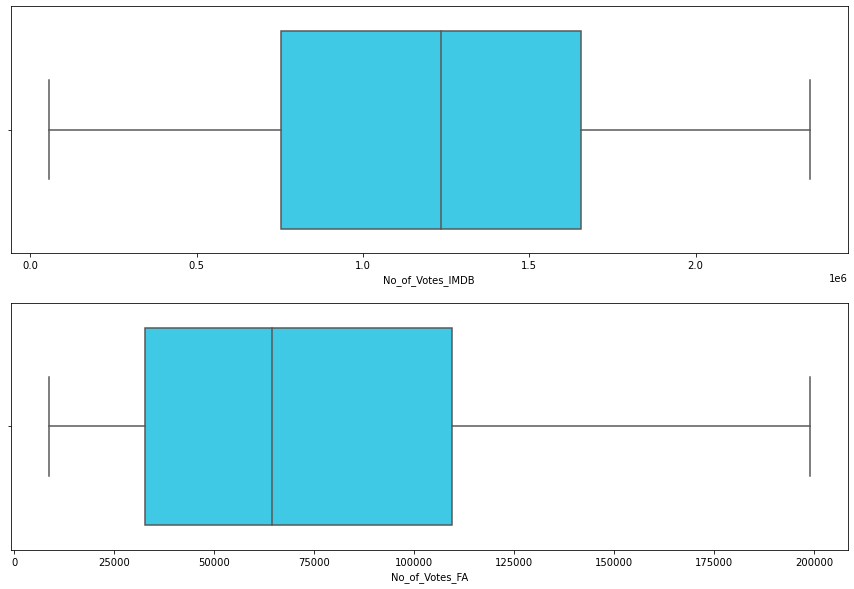

<Figure size 432x288 with 0 Axes>

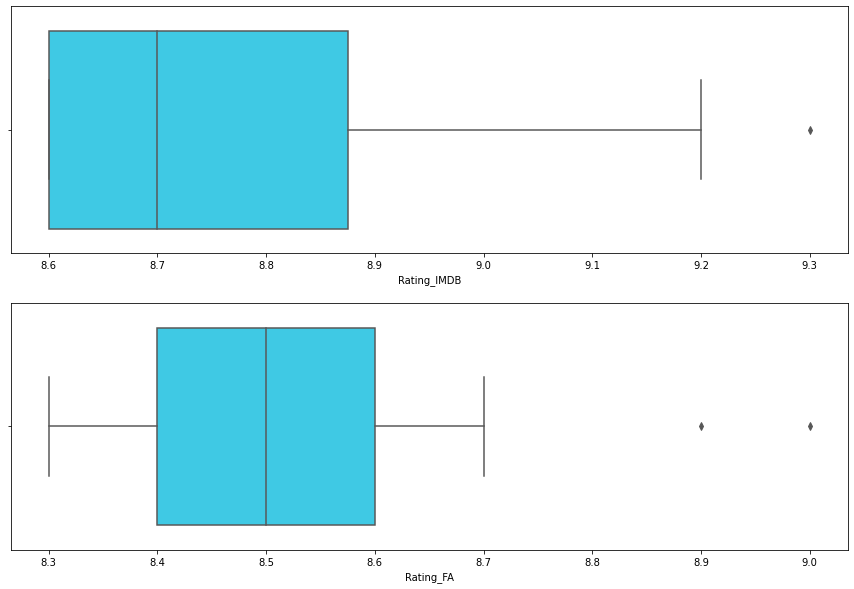

<Figure size 432x288 with 0 Axes>

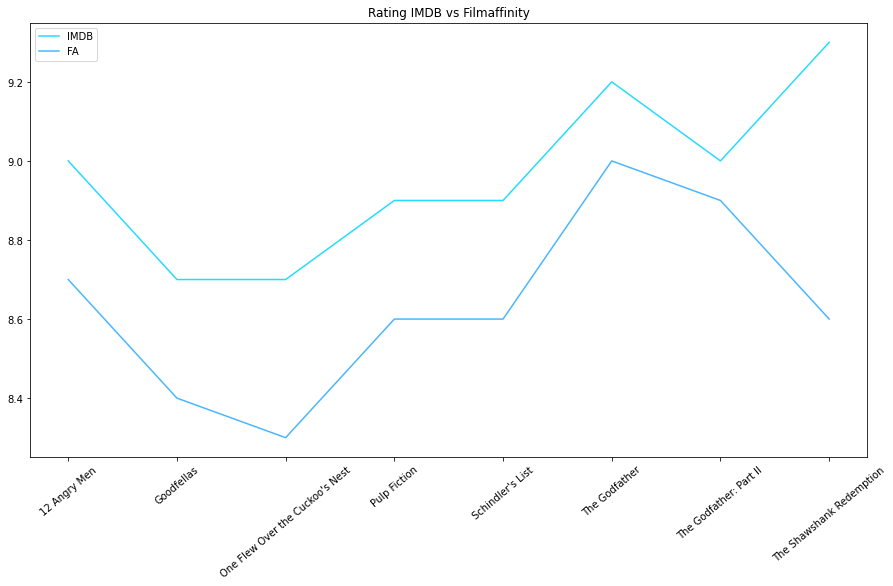

<Figure size 432x288 with 0 Axes>

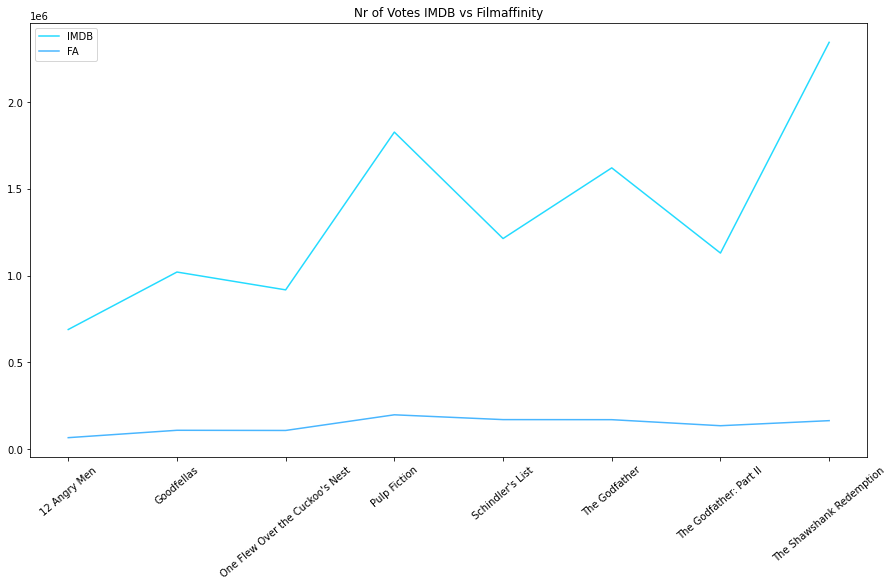

<Figure size 432x288 with 0 Axes>

In [29]:
v.visualization()